In [1]:
!python3 --version

Python 3.11.11


In [2]:
!pip install mlxtend==0.23.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.23.4
    Uninstalling mlxtend-0.23.4:
      Successfully uninstalled mlxtend-0.23.4


In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import sklearn
import networkx as nx
import matplotlib.pyplot as plt
import random
import mlxtend
import math
import plotly.graph_objects as go
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [6]:
file1 = '/content/drive/My Drive/fileTA/Terlaris Tokopedia Juni 2022.xlsx'
data1 = pd.read_excel(file1)

In [7]:
data1fix = data1.rename(columns={'JumlahRating(%)': 'JumlahRating'})

data1fix.to_excel('/content/drive/My Drive/fileTA/Terlaris tokped Juni 2022.xlsx', index=False)

In [8]:
file2 = '/content/drive/My Drive/fileTA/Terlaris Tokopedia April 2022.xlsx'
data2 = pd.read_excel(file2)
file3 = '/content/drive/My Drive/fileTA/Terlaris tokped Juni 2022.xlsx'
data3 = pd.read_excel(file3)

In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16728 entries, 0 to 16727
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LinkProduk                   16728 non-null  object 
 1   Hyperlink                    16728 non-null  object 
 2   NamaProduk                   16728 non-null  object 
 3   LinkToko                     16728 non-null  object 
 4   Hyperlink2                   16728 non-null  object 
 5   NamaToko                     16728 non-null  object 
 6   Harga                        16728 non-null  int64  
 7   HargaAtas                    16728 non-null  int64  
 8   OmsetMinimum                 16728 non-null  int64  
 9   JumlahTerjual                16728 non-null  int64  
 10  JumlahReview                 16728 non-null  int64  
 11  JumlahRating                 16728 non-null  float64
 12  ValidOrder                   16727 non-null  float64
 13  Kategori1       

In [10]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17456 entries, 0 to 17455
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LinkProduk                   17456 non-null  object 
 1   Hyperlink                    17456 non-null  object 
 2   NamaProduk                   17456 non-null  object 
 3   LinkToko                     17456 non-null  object 
 4   Hyperlink2                   17456 non-null  object 
 5   NamaToko                     17456 non-null  object 
 6   Harga                        17456 non-null  int64  
 7   HargaAtas                    17456 non-null  int64  
 8   OmsetMinimum                 17456 non-null  int64  
 9   JumlahTerjual                17456 non-null  int64  
 10  JumlahReview                 17456 non-null  int64  
 11  JumlahRating                 17456 non-null  float64
 12  ValidOrder                   17456 non-null  object 
 13  Kategori1       

In [11]:
hasil = pd.concat([data2, data3])

hasil.to_excel('/content/drive/My Drive/fileTA/TerlarisGabungan.xlsx', index=False)

In [12]:
file4 = '/content/drive/My Drive/fileTA/TerlarisGabungan.xlsx'
dataset = pd.read_excel(file4)
#dataset.sample(5)

In [13]:
# @title EDA
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34184 entries, 0 to 34183
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LinkProduk                   34184 non-null  object 
 1   Hyperlink                    34184 non-null  object 
 2   NamaProduk                   34184 non-null  object 
 3   LinkToko                     34184 non-null  object 
 4   Hyperlink2                   34184 non-null  object 
 5   NamaToko                     34184 non-null  object 
 6   Harga                        34184 non-null  int64  
 7   HargaAtas                    34184 non-null  int64  
 8   OmsetMinimum                 34184 non-null  int64  
 9   JumlahTerjual                34184 non-null  int64  
 10  JumlahReview                 34184 non-null  int64  
 11  JumlahRating                 34184 non-null  float64
 12  ValidOrder                   34183 non-null  object 
 13  Kategori1       

Jumlah Duplikat pada Nama Produk 
  berdasarkan Kategori Produk

Lainnya                      47
Perumahan Subsidi            47
Apartemen                    45
Villa                        43
Secondary Unit               40
Memory Card Gaming           24
Adapter Game Console         23
Smartphone Signal Booster    23
CD PC dan Laptop Gaming      23
Joystick Game                22
Name: count, dtype: int64


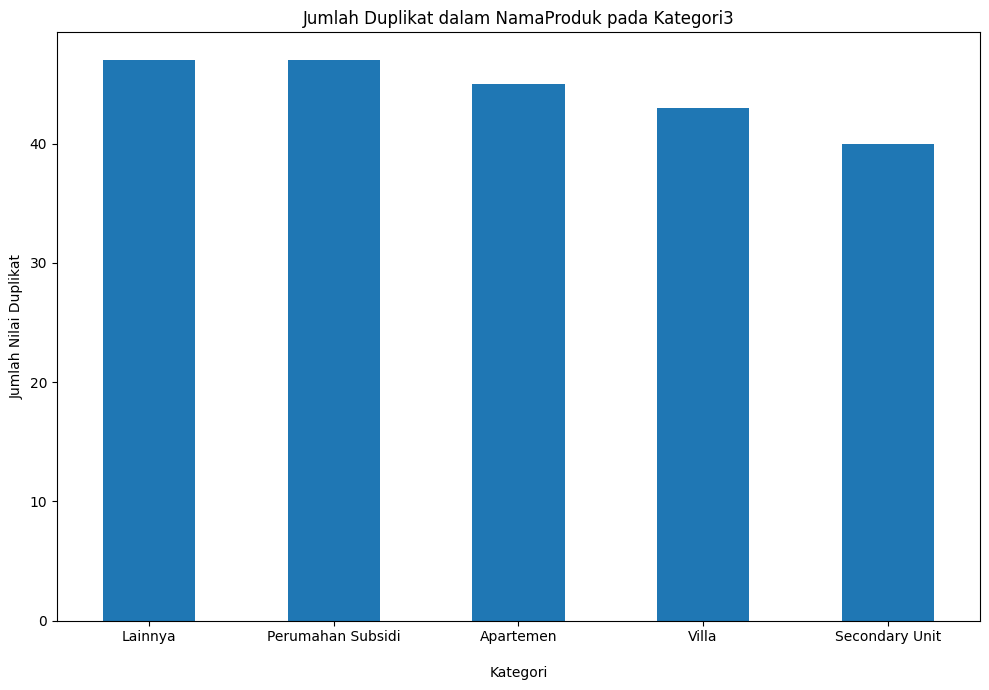

In [14]:
dupl1 = dataset[dataset.duplicated(subset=['NamaProduk'], keep='first')]
data2ka = dupl1.loc[:, ['Kategori3', 'NamaProduk']]

duplCount = data2ka['Kategori3'].value_counts().head(10)
dup10 = duplCount.rename_axis(None)

print("Jumlah Duplikat pada Nama Produk", "\n  berdasarkan Kategori Produk\n")
print(dup10)

plt.figure(figsize=(10, 6))
data2ka['Kategori3'].value_counts().head(5).plot.bar( figsize=(10,7))
plt.title('Jumlah Duplikat dalam NamaProduk pada Kategori3')
plt.xlabel('\nKategori')
plt.ylabel('Jumlah Nilai Duplikat')
plt.xticks(rotation = 0 )
plt.tight_layout()

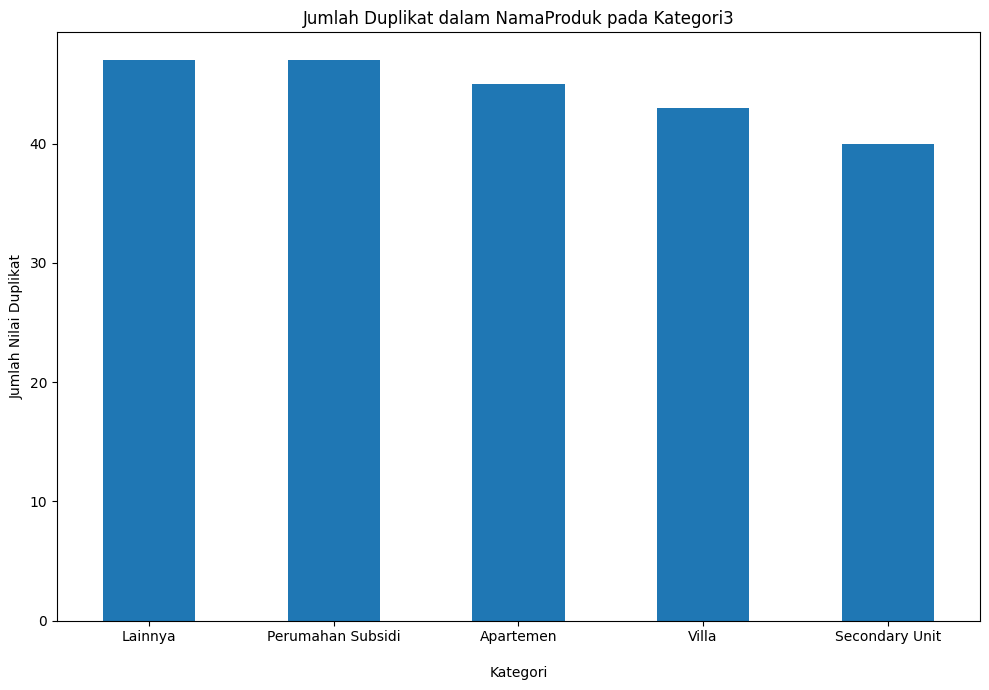

In [15]:
plt.figure(figsize=(10, 6))
data2ka['Kategori3'].value_counts().head(5).plot.bar( figsize=(10,7))
plt.title('Jumlah Duplikat dalam NamaProduk pada Kategori3')
plt.xlabel('\nKategori')
plt.ylabel('Jumlah Nilai Duplikat')
plt.xticks(rotation = 0 )
plt.tight_layout()

Kategori Produk yang Sering Dibeli

Lainnya                      136
Rumah                        120
Villa                        120
Apartemen                    120
Perumahan Subsidi            120
Secondary Unit               120
Nintendo                      56
Baterai Game Console          56
CD Xbox                       56
Smartphone Signal Booster     56
Name: count, dtype: int64


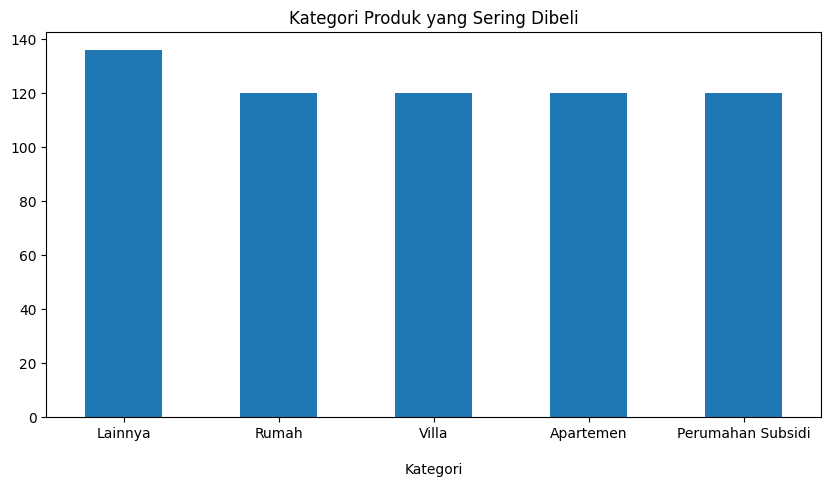

In [16]:
katProduk = dataset["Kategori3"].value_counts().rename_axis(None)
print('Kategori Produk yang Sering Dibeli\n')
print(katProduk.head(10))

katProduk.head(5).plot.bar( figsize=(10,5))
plt.title('Kategori Produk yang Sering Dibeli')
plt.xlabel('\nKategori')
plt.xticks(rotation = 0 )
plt.show()

Jumlah Nilai Kenaikan Penjualan

0.0    2096
1.0     748
2.0     623
3.0     482
4.0     473
5.0     430
6.0     373
8.0     364
7.0     358
9.0     325
Name: count, dtype: int64


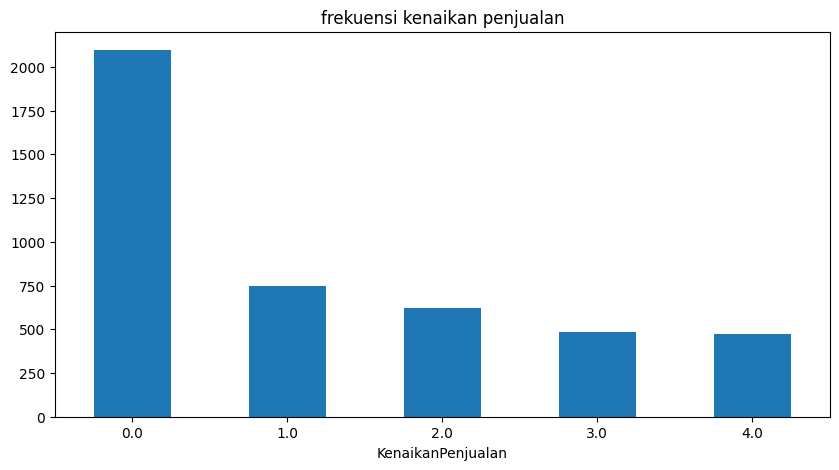

In [17]:
frekKP = dataset["KenaikanPenjualan"].value_counts()
print("Jumlah Nilai Kenaikan Penjualan\n")
print(frekKP.rename_axis(None).head(10))

frekKP.head(5).plot.bar( figsize=(10,5))
plt.title('frekuensi kenaikan penjualan')
plt.xticks(rotation = 0 )
plt.show()

In [18]:
tipeHrg = dataset['Harga'].apply(type).unique()
print(tipeHrg)

[<class 'int'>]


In [19]:
# @title preprocessing-select
dataSelect = dataset[['KenaikanPenjualan', 'Kategori3']]
print(dataSelect)

       KenaikanPenjualan             Kategori3
0                    2.0  Adapter Game Console
1                   26.0  Adapter Game Console
2                   69.0  Adapter Game Console
3                   94.0  Adapter Game Console
4                  154.0  Adapter Game Console
...                  ...                   ...
34179                NaN      Wedding Souvenir
34180                NaN      Wedding Souvenir
34181                NaN      Wedding Souvenir
34182                NaN  Jasa Desain Undangan
34183                NaN                   NaN

[34184 rows x 2 columns]


In [20]:
dataSelect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34184 entries, 0 to 34183
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   KenaikanPenjualan  26302 non-null  float64
 1   Kategori3          33896 non-null  object 
dtypes: float64(1), object(1)
memory usage: 534.3+ KB


Jumlah Nilai Kenaikan Penjualan

454.726473    2096
1.000000       748
2.000000       623
3.000000       482
4.000000       473
5.000000       430
6.000000       373
8.000000       364
7.000000       358
9.000000       325
Name: count, dtype: int64


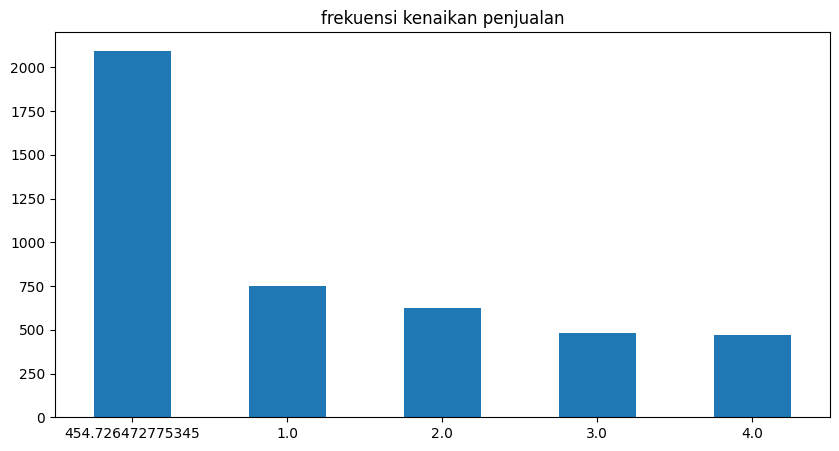

In [21]:
# @title preprocessing-cleaning
KPMean = dataSelect[dataSelect["KenaikanPenjualan"] > 0]["KenaikanPenjualan"].mean()

dataSelect.loc[:, "KenaikanPenjualan"] = dataSelect["KenaikanPenjualan"].replace(0, KPMean)

frekKP1 = dataSelect["KenaikanPenjualan"].value_counts().rename_axis(None)
print("Jumlah Nilai Kenaikan Penjualan\n")
print(frekKP1.head(10))

frekKP1.head(5).plot.bar( figsize=(10,5))
plt.title('frekuensi kenaikan penjualan')
plt.xticks(rotation = 0)
plt.show()

In [22]:
dataSelect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34184 entries, 0 to 34183
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   KenaikanPenjualan  26302 non-null  float64
 1   Kategori3          33896 non-null  object 
dtypes: float64(1), object(1)
memory usage: 534.3+ KB


In [23]:
dataSelect.dropna(inplace=True)
dataSelect=dataSelect[dataSelect.Kategori3 != 'Lainnya']

dataSelect.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25989 entries, 0 to 34168
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   KenaikanPenjualan  25989 non-null  float64
 1   Kategori3          25989 non-null  object 
dtypes: float64(1), object(1)
memory usage: 609.1+ KB


<ipython-input-23-f8b391635046>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSelect.dropna(inplace=True)


Kategori Produk yang Sering Dibeli

Perumahan Subsidi            107
Secondary Unit               101
Apartemen                     97
Villa                         97
Rumah                         55
Memory Card Gaming            51
CD PC dan Laptop Gaming       51
Smartphone Signal Booster     48
PlayStation                   48
Adapter Game Console          47
Name: count, dtype: int64


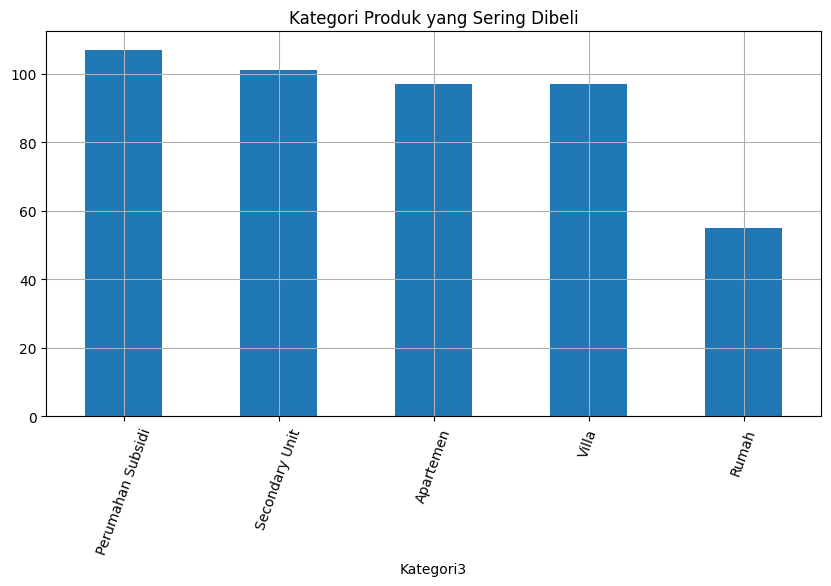

In [24]:
katProduk1 = dataSelect["Kategori3"].value_counts().rename_axis(None)
print("Kategori Produk yang Sering Dibeli\n")
print(katProduk1.head(10))

dataSelect["Kategori3"].value_counts().head(5).plot.bar(figsize=(10,5))
plt.title('Kategori Produk yang Sering Dibeli')
plt.xticks(rotation = 70)
plt.grid()
plt.show()

In [25]:
dataSelect.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25989 entries, 0 to 34168
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   KenaikanPenjualan  25989 non-null  float64
 1   Kategori3          25989 non-null  object 
dtypes: float64(1), object(1)
memory usage: 609.1+ KB


In [26]:
# @title preprocessing-transform
uid = dataSelect['KenaikanPenjualan'].unique()

Kat3Unik = []
for u in uid:
    katU = list(set(dataSelect[dataSelect['KenaikanPenjualan'] == u].Kategori3))
    Kat3Unik.append([u] + katU)

# dataTrans = pd.DataFrame(Kat3Unik)
# dataTrans.to_excel('/content/drive/My Drive/fileTA/data_transaksi.xlsx', index=False, header=False)

In [27]:
# @title preprocessing-transform
onehot = pd.DataFrame(Kat3Unik)

uid = onehot[0]
kategori = onehot.drop(columns=[0])

dataset1 = pd.get_dummies(kategori.apply(pd.Series).stack()).groupby(level=0).sum()
dataset1.index = uid
dataset1.head(5)

,Motherboard,3D Puzzle,AC Portable,AC Reflektor,AC Standing,Abaya,Abon,Abs Roller,Access Control Door,Action Camera,...,Yoga Mat,Yogurt,Yukata Pria,Yukata Wanita,benang dan tusuk gigi,eyeshadow,gasing,iOS,microSD Card,miniSD Card
0,,,,,,,,,,,,,,,,,,,,,
2.0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
26.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:

# @title MBA
frequent_itemsets = fpgrowth(dataset1, min_support=0.006, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.016713,(Adapter Game Console)
1,0.016713,(PlayStation)
2,0.016249,(Casing & Silikon Game Console)
3,0.014856,(Memory Card Gaming)
4,0.014856,(CD PC dan Laptop Gaming)
...,...,...
413,0.006035,"(Xbox, Asuransi Perjalanan)"
414,0.006500,"(Nintendo, PlayStation)"
415,0.006035,"(Adapter Game Console, Foot Spray)"
416,0.006964,"(Rumah, CD PlayStation)"


In [29]:
frequent_itemsets_sorted = frequent_itemsets.sort_values(by="support", ascending=False)
print(frequent_itemsets_sorted.head(20))

      support                         itemsets
228  0.018570                  (Joystick Game)
0    0.016713           (Adapter Game Console)
1    0.016713                    (PlayStation)
2    0.016249  (Casing & Silikon Game Console)
207  0.016249                        (Gamepad)
3    0.014856             (Memory Card Gaming)
4    0.014856        (CD PC dan Laptop Gaming)
5    0.013928                 (CD PlayStation)
137  0.013928                    (Masker Kain)
67   0.013463                       (Nintendo)
210  0.013463                   (Gunting Kuku)
6    0.013463                    (CD Nintendo)
7    0.012535                        (CD Xbox)
68   0.011606                     (Foot Spray)
138  0.011606                          (Rumah)
10   0.011142               (Travel Case Game)
120  0.011142                       (Backdrop)
8    0.011142           (Baterai Game Console)
9    0.011142                 (Travel Voucher)
11   0.011142                           (Xbox)


In [30]:
frequent_1_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)]

print("Frequent 1-itemsets:")
print(frequent_1_itemsets.info())
print(frequent_1_itemsets.sort_values(by="support", ascending=False).head(10))

Frequent 1-itemsets:
<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 354 to 417
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   61 non-null     float64
 1   itemsets  61 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.4+ KB
None
      support                                           itemsets
381  0.008357                             (Xbox, CD PlayStation)
355  0.007892  (Casing & Silikon Game Console, Adapter Game C...
382  0.007892              (Casing & Silikon Game Console, Xbox)
383  0.007428                                (PlayStation, Xbox)
360  0.007428          (CD PC dan Laptop Gaming, CD PlayStation)
361  0.007428                      (PlayStation, CD PlayStation)
362  0.007428             (CD PlayStation, Adapter Game Console)
354  0.006964                (PlayStation, Adapter Game Console)
368  0.006964                          (CD Xbox, CD PlayStation)
416  0.006964   

In [31]:
frequent_2_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 3)]

print("Frequent 3-itemsets:")
print(frequent_2_itemsets.info())
frequent_2_itemsets.sort_values(by="support", ascending=False).head(10)

Frequent 3-itemsets:
<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 390 to 392
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   3 non-null      float64
 1   itemsets  3 non-null      object 
dtypes: float64(1), object(1)
memory usage: 72.0+ bytes
None


,support,itemsets
390,0.006035,"(Casing & Silikon Game Console, Xbox, CD PlayS..."
391,0.006035,"(Xbox, CD PlayStation, Travel Case Game)"
392,0.006035,"(Xbox, CD Xbox, CD PlayStation)"


In [32]:
rules_fp = association_rules(frequent_itemsets, metric='confidence', min_threshold = 0.65)

rules_fp.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Xbox),(CD PlayStation),0.011142,0.013928,0.008357,0.750000,53.850000,0.008201,3.944290,0.992488
1,(Xbox),(Casing & Silikon Game Console),0.011142,0.016249,0.007892,0.708333,43.592857,0.007711,3.372861,0.988070
2,(Xbox),(PlayStation),0.011142,0.016713,0.007428,0.666667,39.888889,0.007242,2.949861,0.985915
3,"(Casing & Silikon Game Console, Xbox)",(CD PlayStation),0.007892,0.013928,0.006035,0.764706,54.905882,0.005925,4.190808,0.989597
4,"(Casing & Silikon Game Console, CD PlayStation)",(Xbox),0.006500,0.011142,0.006035,0.928571,83.339286,0.005963,13.844011,0.994464


In [33]:
rules_fp [['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,(Xbox),(CD PlayStation),0.008357,0.750000,53.850000
1,(Xbox),(Casing & Silikon Game Console),0.007892,0.708333,43.592857
2,(Xbox),(PlayStation),0.007428,0.666667,39.888889
3,"(Casing & Silikon Game Console, Xbox)",(CD PlayStation),0.006035,0.764706,54.905882
4,"(Casing & Silikon Game Console, CD PlayStation)",(Xbox),0.006035,0.928571,83.339286
5,"(Xbox, CD PlayStation)",(Casing & Silikon Game Console),0.006035,0.722222,44.447619
6,"(Xbox, CD PlayStation)",(Travel Case Game),0.006035,0.722222,64.819444
7,"(Xbox, Travel Case Game)",(CD PlayStation),0.006035,0.866667,62.226667
8,"(CD PlayStation, Travel Case Game)",(Xbox),0.006035,0.866667,77.783333
9,"(CD Xbox, Xbox)",(CD PlayStation),0.006035,0.928571,66.671429


In [34]:
sorted_rules = rules_fp.sort_values(by=['support', 'confidence', 'lift'], ascending=[False, False, False])
sorted_rules.index = range(1, len(sorted_rules)+1)
sorted_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
1,(Xbox),(CD PlayStation),0.008357,0.750000,53.850000
2,(Xbox),(Casing & Silikon Game Console),0.007892,0.708333,43.592857
3,(Xbox),(PlayStation),0.007428,0.666667,39.888889
4,(Game Boy),(Casing & Silikon Game Console),0.006964,0.750000,46.157143
5,(Game Retro),(Xbox),0.006500,0.700000,62.825000
6,(Voucher Hotel),(Memory Card Gaming),0.006500,0.700000,47.118750
7,(Game Retro),(PlayStation),0.006500,0.700000,41.883333
8,(Apartemen),(Casing & Silikon Game Console),0.006500,0.666667,41.028571
9,(Apartemen),(PlayStation),0.006500,0.666667,39.888889
10,(Smartphone Signal Booster),(Adapter Game Console),0.006500,0.666667,39.888889


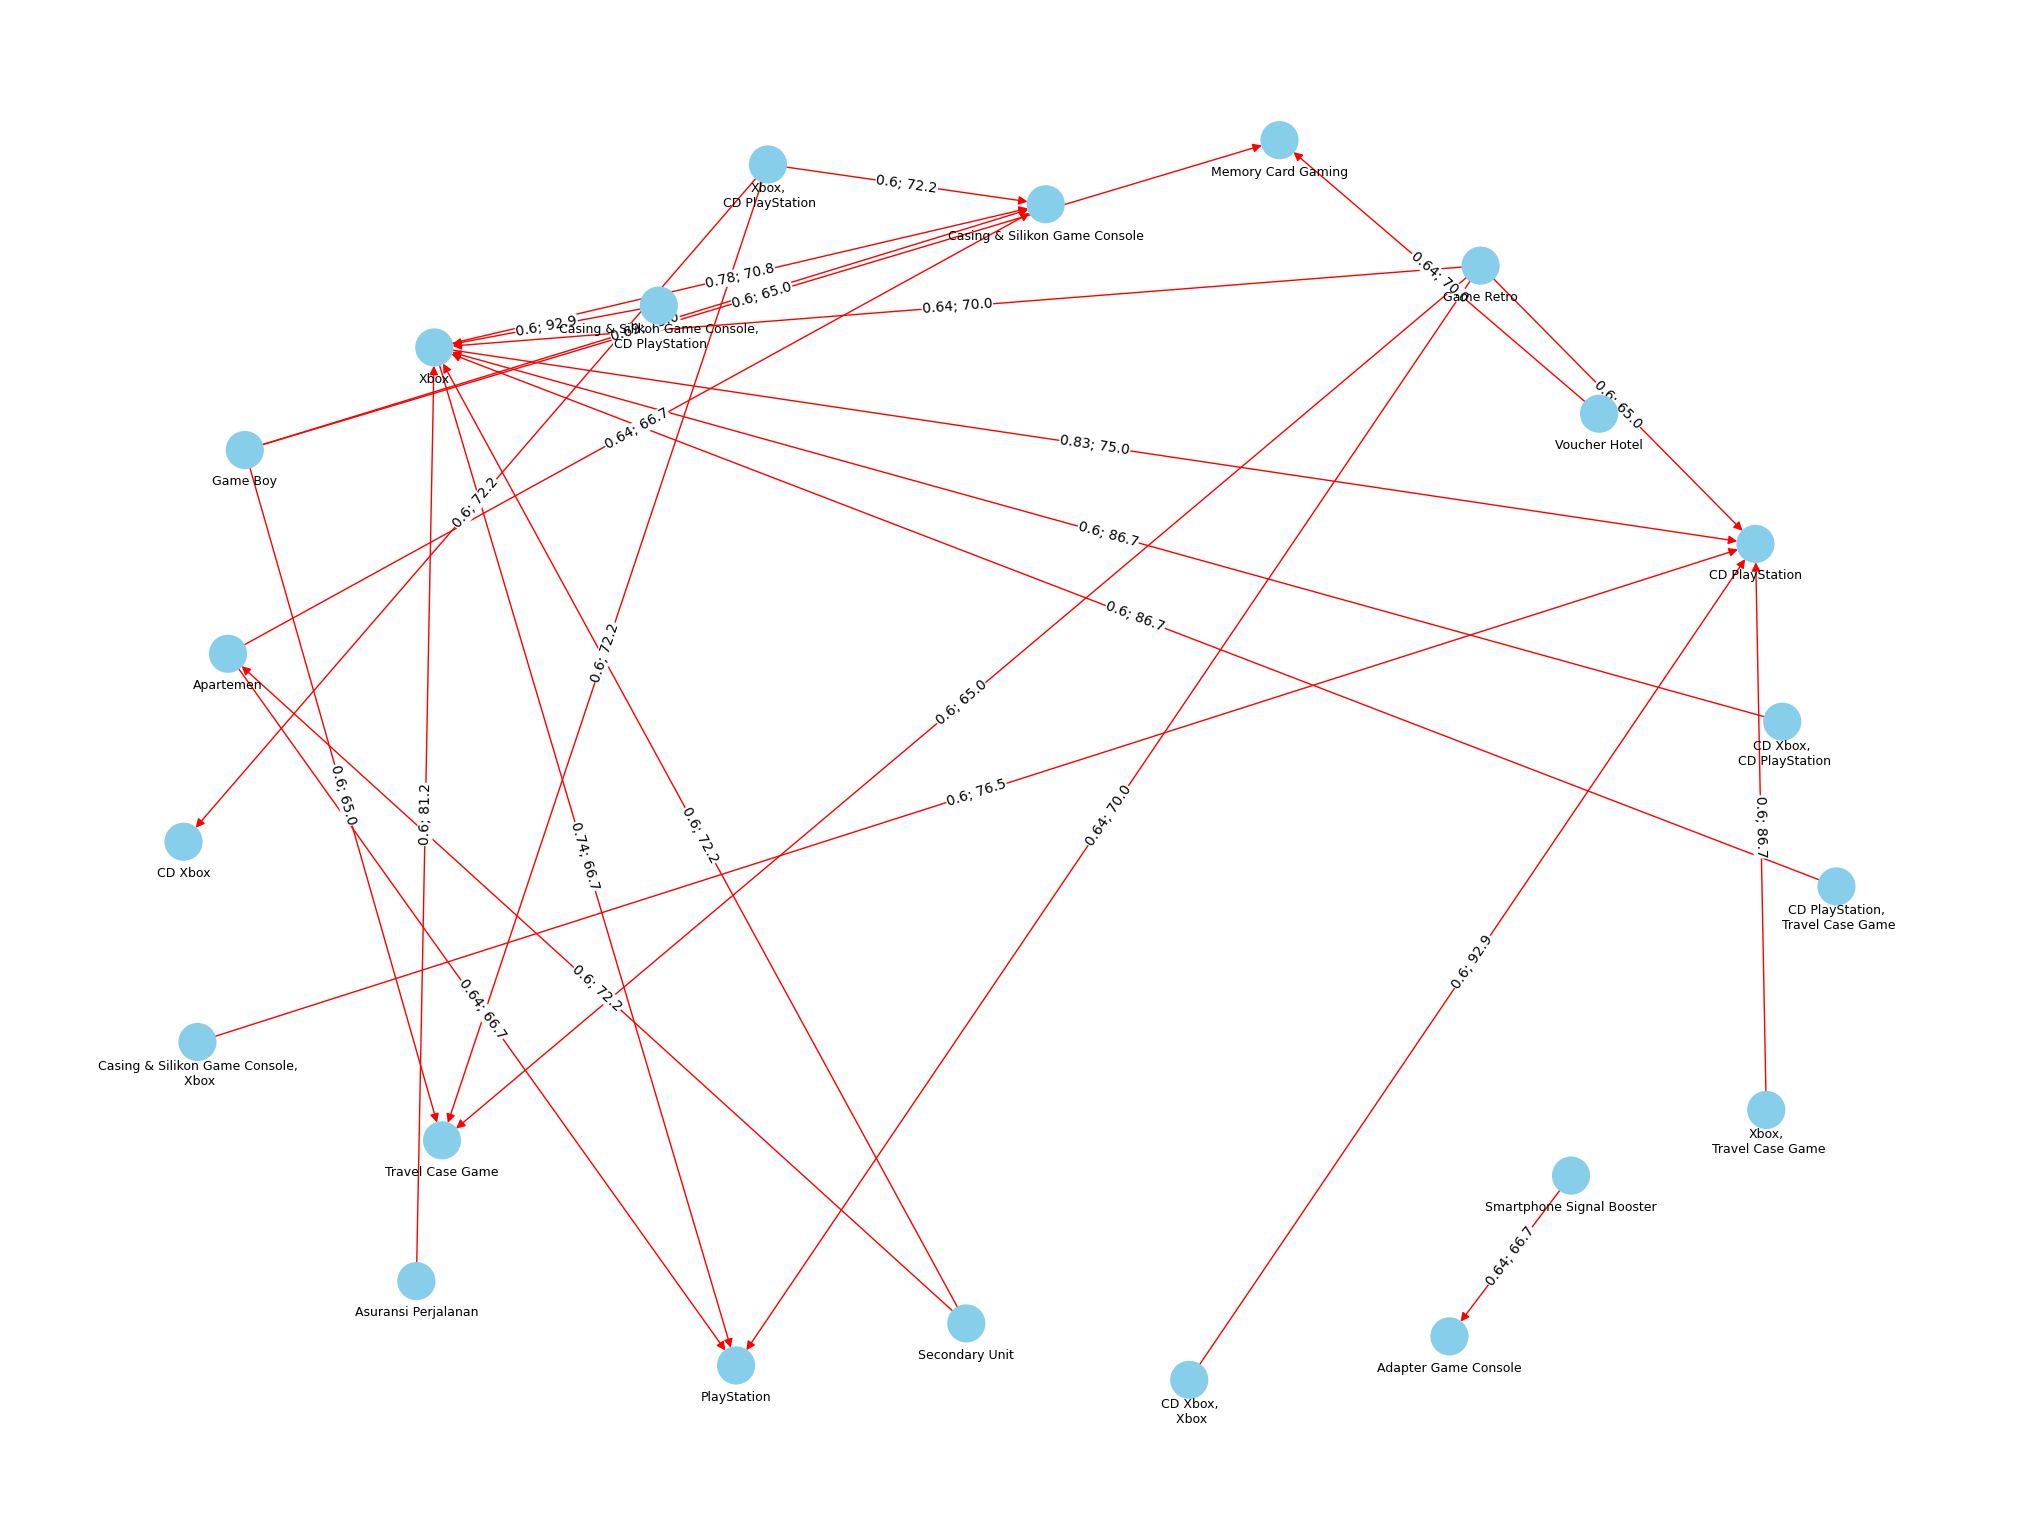

In [35]:
# @title modelling
sorted_rules
penggaris = sorted_rules.head(10)

G = nx.DiGraph(); antecedent_nodes = set(); consequent_nodes = set()
for index, row in sorted_rules.iterrows():
    sup_val = math.floor(row['support'] * 100 * 100) / 100
    conf_val = f"{row['confidence'] * 100:.1f}"
    antecedents_str = ',\n '.join(row['antecedents'])
    consequents_str = ', '.join(row['consequents'])
    combined_label = f"{sup_val}; {conf_val}"
    G.add_edge(antecedents_str, consequents_str, label=combined_label)

nodeColors = ['skyblue' for _ in G.nodes()]
pos = nx.fruchterman_reingold_layout(G, k=20, iterations=50);
plt.figure(figsize=(20, 15))

pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] - 0.05)

nx.draw(G, pos, with_labels=False, node_color=nodeColors, edge_color='red', arrows=True, node_size=700, arrowsize=13)
nx.draw_networkx_labels(G, pos_attrs, font_size=9, font_color='black', verticalalignment='center')

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, bbox=dict(facecolor="white", edgecolor="none", pad=0.5))

plt.show()

In [36]:
data = {
    'support' : sorted_rules['support'],
    'confidence' : sorted_rules['confidence'],
    'lift' : sorted_rules['lift'],
    }

dfGraf = pd.DataFrame(data)

def generate_random_colors(num_colors):
    colors = []
    for _ in range(num_colors):
        color = f"rgb({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)})"
        colors.append(color)
    return colors

colors = generate_random_colors(len(dfGraf))

fig = go.Figure(data=go.Parcoords(
    line=dict(color=dfGraf.index, colorscale=colors, showscale=True),
    dimensions=[
        dict(label='support', values=dfGraf['support'],
             tickvals=sorted(dfGraf['support'].unique()),
             ticktext=[f"{val:.4f}" for val in sorted(dfGraf['support'].unique())]),
        dict(label='confidence', values=dfGraf['confidence']),
        dict(label='lift', values=dfGraf['lift'])
    ]
))

fig.update_layout(
    title="Parallel Coordinates Plot",
    coloraxis_colorbar=dict(title='Aturan')
)

fig.show()